MODELOS DE Feed Forward NN PARA DEMANDA DE GAS NATURAL EN SECTOR ELÉCTRICO EN MÉXICO

https://github.com/bnsreenu/python_for_microscopists/blob/master/164b-Intro_to_time_series_Forecasting_using_feed_forward_NN_and_TimeseriesGenerator.py

https://github.com/bnsreenu/python_for_microscopists/tree/master

https://www.youtube.com/watch?v=tKM5d8Ll1k0


Importamos la data de Demanda de gas en sector eléctrico como un CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_demanda_electrico_original = pd.read_csv('Demanda_electrico_2022_full1.csv',index_col='Date',parse_dates=True)
csv_demanda_electrico_original

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2022-05-01,3350.03
2022-06-01,3498.70
2022-07-01,3350.97


Vamos a graficar los datos "originales" de demanda eléctrico desde 2005 hasta 2022

Text(0, 0.5, 'Demanda [MMpcd]')

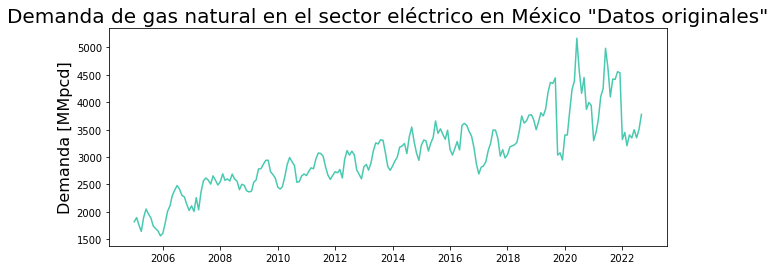

In [3]:
plt.figure(figsize=(10,4))
plt.plot(csv_demanda_electrico_original, color='#48C9B0')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos originales"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Vamos a descomponer la serie de tiempo de datos "originales" de demanda eléctrico desde 2005 hasta 2022 en sus compoentes de Tendencia, Estacionalidad y Residual 

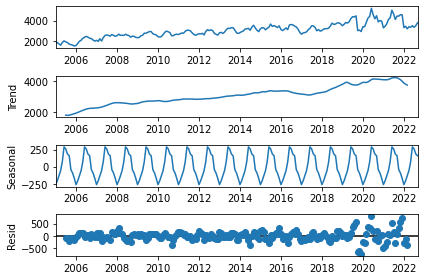

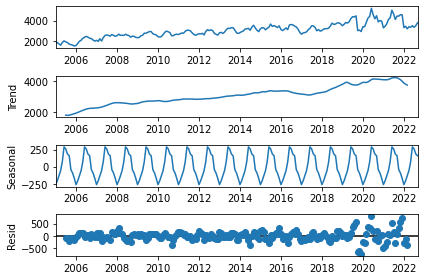

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

csv_demanda_electrico_original_seasonal_decomposition = seasonal_decompose(csv_demanda_electrico_original)
csv_demanda_electrico_original_seasonal_decomposition.plot()

Separamos la Demanda de gas natural en el sector eléctrico en data de train y test

In [5]:
# Number of data points to keep for testing (in this case, the last 12)
num_test_points = 12

# Split the data into training and testing sets
csv_demanda_electrico_original_train_data = csv_demanda_electrico_original[:-num_test_points]
csv_demanda_electrico_original_test_data = csv_demanda_electrico_original[-num_test_points:]

csv_demanda_electrico_original_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


Para la aplicación de RNN(LSTM) combiene escalar la data. Por lo que se define y entrena el MinMaxScaler

In [6]:
from sklearn.preprocessing import MinMaxScaler
MinMax_scaler = MinMaxScaler()
MinMax_scaler.fit(csv_demanda_electrico_original_train_data)

MinMaxScaler()

Se aplica la escalación de data

In [7]:
csv_demanda_electrico_scaled_train = MinMax_scaler.transform(csv_demanda_electrico_original_train_data)
csv_demanda_electrico_scaled_test = MinMax_scaler.transform(csv_demanda_electrico_original_test_data)
csv_demanda_electrico_scaled_train

array([[0.07168816],
       [0.09268731],
       [0.0567961 ],
       [0.02265413],
       [0.09274552],
       [0.13604118],
       [0.11118319],
       [0.09111549],
       [0.04937779],
       [0.03740758],
       [0.02438673],
       [0.        ],
       [0.0137139 ],
       [0.06801505],
       [0.1236108 ],
       [0.15172886],
       [0.20456354],
       [0.23227963],
       [0.2549393 ],
       [0.23621611],
       [0.20444988],
       [0.1976359 ],
       [0.15896421],
       [0.12890563],
       [0.15187856],
       [0.12359139],
       [0.19350815],
       [0.13185522],
       [0.2219949 ],
       [0.27894624],
       [0.2931425 ],
       [0.28230888],
       [0.26220515],
       [0.30390127],
       [0.28192632],
       [0.25737049],
       [0.27370963],
       [0.31419986],
       [0.28129981],
       [0.28810548],
       [0.27775144],
       [0.31287199],
       [0.28763698],
       [0.27746314],
       [0.23393184],
       [0.26135964],
       [0.25557967],
       [0.228

When using a NN for multi-step time series forecasting there are two main approaches to take: 
a) Direct Multi-Step Forecast:Prefict all future time steps directly using a single Dense output layer.
b) Auto-Regresive Prediction: Predict one step at a time and feed the predicted value back into the model to predict the next step
Source: Spencer Pao, RNN Appliying Understanding Recurrent NN in Python 

Se generan sets de n_input datos para con ellos predecir el t+1 dato, y así los siguientes n_input para predecir el t+1, etc 

In [9]:

from keras.preprocessing.sequence import TimeseriesGenerator

In [35]:
# We do the same thing, but now instead for 12 months
n_input = 24
demanda_electrico_scaled_train_generator = TimeseriesGenerator(csv_demanda_electrico_scaled_train, csv_demanda_electrico_scaled_train, length=n_input, batch_size=1)
demanda_electrico_scaled_train_generator

In [36]:
print("Total number of samples in the original training data = ", len(csv_demanda_electrico_scaled_train)) 
print("Total number of samples in the demanda_electrico_scaled_train_generator = ", len(demanda_electrico_scaled_train_generator))

Total number of samples in the original training data =  201
Total number of samples in the demanda_electrico_scaled_train_generator =  177


In [37]:
X,y = demanda_electrico_scaled_train_generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.07168816 0.09268731 0.0567961  0.02265413 0.09274552 0.13604118
 0.11118319 0.09111549 0.04937779 0.03740758 0.02438673 0.
 0.0137139  0.06801505 0.1236108  0.15172886 0.20456354 0.23227963
 0.2549393  0.23621611 0.20444988 0.1976359  0.15896421 0.12890563]
Predict this y: 
 [[0.15187856]]


In [38]:
X,y = demanda_electrico_scaled_train_generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.09268731 0.0567961  0.02265413 0.09274552 0.13604118 0.11118319
 0.09111549 0.04937779 0.03740758 0.02438673 0.         0.0137139
 0.06801505 0.1236108  0.15172886 0.20456354 0.23227963 0.2549393
 0.23621611 0.20444988 0.1976359  0.15896421 0.12890563 0.15187856]
Predict this y: 
 [[0.12359139]]


Se importan las librerias necesarias y se define la Feed Forward Sequential Neural Network

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [32]:
n_input = 24
n_features = 1
# define model
model_sequential_and_FF = Sequential()
model_sequential_and_FF.add(Dense(64, activation='relu', input_dim= n_input))
model_sequential_and_FF.add(Dense(32,activation='relu'))
model_sequential_and_FF.add(Dense(1))
model_sequential_and_FF.compile(optimizer='adam', loss='mse')

In [33]:
model_sequential_and_FF.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1600      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3713 (14.50 KB)
Trainable params: 3713 (14.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenamos el modelo  Feed Forward Sequential Neural Network con el demanda_electrico_scaled_train_generator

In [21]:
model_sequential_and_FF.fit(demanda_electrico_scaled_train_generator, epochs=25)

Epoch 1/25


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_2/dense_2/Tensordot/MatMul' defined at (most recent call last):
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Sergio\AppData\Local\Temp\ipykernel_10316\603131190.py", line 1, in <cell line: 1>
      model_sequential_and_FF.fit(demanda_electrico_scaled_train_generator, epochs=25)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py", line 244, in call
      outputs = tf.tensordot(inputs, self.kernel, [[rank - 1], [0]])
Node: 'sequential_2/dense_2/Tensordot/MatMul'
Matrix size-incompatible: In[0]: [24,1], In[1]: [24,64]
	 [[{{node sequential_2/dense_2/Tensordot/MatMul}}]] [Op:__inference_train_function_1134]

In your model, you have defined a feedforward neural network with the following layers:

1. Input layer with input_dim=24.
2. A hidden layer with 64 units and ReLU activation.
3. Another hidden layer with 32 units and ReLU activation.
4. An output layer with 1 unit (assuming you are predicting a single value).

The error specifically occurs during the matrix multiplication in the second dense layer (dense_2). Here's why:

The input shape for this layer is [batch_size, input_dim], where batch_size is determined by your data generator, and input_dim is 24.
The weight matrix for this layer has a shape of [input_dim, 32], which means it expects the input to have 24 features (columns), but your input has only 1 feature because you're processing sequential data.

The error specifically occurs during the matrix multiplication in the second dense layer (dense_2). Here's why:

The input shape for this layer is [batch_size, input_dim], where batch_size is determined by your data generator, and input_dim is 24.
The weight matrix for this layer has a shape of [input_dim, 32], which means it expects the input to have 24 features (columns), but your input has only 1 feature because you're processing sequential data.

In [40]:
# Define your data generator
n_input = 24
n_features = 1
batch_size = 1

data_generator = TimeseriesGenerator(csv_demanda_electrico_scaled_train, csv_demanda_electrico_scaled_train, length=n_input, batch_size=batch_size)

# Define your model
model_sequential_and_FF = Sequential()
model_sequential_and_FF.add(Dense(64, activation='relu', input_shape=(n_input, n_features)))
model_sequential_and_FF.add(Dense(32, activation='relu'))
model_sequential_and_FF.add(Dense(1))
model_sequential_and_FF.compile(optimizer='adam', loss='mse')

 Entrenamos el modelo  Feed Forward Sequential Neural Network con el demanda_electrico_scaled_train_generator

In [41]:
model_sequential_and_FF.fit(data_generator, epochs=25)

Epoch 1/25
177/177 [==============================] - 2s 2ms/step - loss: 0.0187
Epoch 2/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 3/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 4/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 5/25
177/177 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 6/25
177/177 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 7/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 8/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 9/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 10/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 11/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 12/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 13/25
177/177 [====

Se grafica la perdida por epoch 

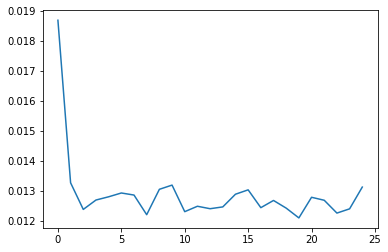

In [42]:
loss_per_epoch = model_sequential_and_FF.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

Se lleva a cabo el forecast de los ultimos 12 meses usando el modelo model_LSTM_and_Dense previamente definido y entrenado

Se toman los ultimos n_input elementos de los datos de train y se almacenan en un batch

In [43]:
demanda_electrico_scaled_train_batch = csv_demanda_electrico_scaled_train[-n_input:]
demanda_electrico_scaled_train_batch

array([[0.40929895],
       [0.42016029],
       [0.38425244],
       [0.51049126],
       [0.51049126],
       [0.62604337],
       [0.74135154],
       [0.7836714 ],
       [1.        ],
       [0.83747356],
       [0.72153611],
       [0.80133008],
       [0.64003449],
       [0.67506632],
       [0.65981388],
       [0.48164966],
       [0.52483443],
       [0.58778751],
       [0.7051942 ],
       [0.74375778],
       [0.94934147],
       [0.85129557],
       [0.70352813],
       [0.79378425]])

Se reescala el batch de los datos de train a que tenga la misma forma que los datos con que se entrenó el modelo que fueron  1, input_shape=(n_input, n_features)

In [44]:
demanda_electrico_scaled_train_batch_reshaped = demanda_electrico_scaled_train_batch.reshape(1,n_input, n_features)
demanda_electrico_scaled_train_batch_reshaped

array([[[0.40929895],
        [0.42016029],
        [0.38425244],
        [0.51049126],
        [0.51049126],
        [0.62604337],
        [0.74135154],
        [0.7836714 ],
        [1.        ],
        [0.83747356],
        [0.72153611],
        [0.80133008],
        [0.64003449],
        [0.67506632],
        [0.65981388],
        [0.48164966],
        [0.52483443],
        [0.58778751],
        [0.7051942 ],
        [0.74375778],
        [0.94934147],
        [0.85129557],
        [0.70352813],
        [0.79378425]]])

Intentamos predecir el sigueinte valor dado el primet batch de n_input. Esto equivaldria a predecir el primer valor de los datos de test, dados los n_input anteriores

In [50]:
model_sequential_and_FF.predict(demanda_electrico_scaled_train_batch_reshaped)

1/1 [==============================] - 0s 42ms/step


array([[[0.41364413],
        [0.4219031 ],
        [0.39459875],
        [0.48908752],
        [0.48908752],
        [0.57383496],
        [0.65005136],
        [0.67794085],
        [0.82050514],
        [0.71339744],
        [0.63699263],
        [0.6895782 ],
        [0.5832817 ],
        [0.60636824],
        [0.59631664],
        [0.46784905],
        [0.4996336 ],
        [0.54581994],
        [0.626223  ],
        [0.65163714],
        [0.7871203 ],
        [0.7225064 ],
        [0.6251251 ],
        [0.6846054 ]]], dtype=float32)

In [52]:
model_sequential_and_FF.predict(demanda_electrico_scaled_train_batch_reshaped)[0][-1][0]

1/1 [==============================] - 0s 29ms/step


0.6846054

Y se compara el valor de forecast del modelo model_LSTM_and_Dense con los datos de test de la demanda de gasd natural en sector eléctrico escalado 

In [51]:
csv_demanda_electrico_scaled_test[0]

array([0.791877])

Ahora ser hará una función que irá formando batch de n_input para ir prediciendo el siguiente valor, tal como se hizo en el entrenamiento del modelo 

In [53]:
n_input = 24
n_features = 1

In [57]:
test_predictions = []

first_eval_batch = csv_demanda_electrico_scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(csv_demanda_electrico_scaled_test)):
    
    # get the prediction value for the first batch
    current_pred = model_sequential_and_FF.predict(current_batch)[0][-1][0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[[current_pred]]],axis=1)
    current_batch = current_batch.reshape((1, n_input, n_features))  # Reshape to maintain the 3D shape
    


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 28ms/step


In [58]:
test_predictions 

[0.6846054,
 0.6126547,
 0.5640357,
 0.5284213,
 0.5022708,
 0.4830433,
 0.4688783,
 0.45841634,
 0.45068514,
 0.44497013,
 0.4407455,
 0.43755612]

In [62]:
import numpy as np

# Convert the Python list to a NumPy array
test_predictions_array = np.array(test_predictions)

# Assuming test_predictions is your 1D array
# Reshape it into a 2D array with a single column
test_predictions_2d = test_predictions_array.reshape(-1, 1)

test_predictions_2d

array([[0.6846054 ],
       [0.6126547 ],
       [0.5640357 ],
       [0.5284213 ],
       [0.5022708 ],
       [0.4830433 ],
       [0.4688783 ],
       [0.45841634],
       [0.45068514],
       [0.44497013],
       [0.4407455 ],
       [0.43755612]], dtype=float32)

In [26]:
csv_demanda_electrico_scaled_test

array([[0.791877  ],
       [0.83064572],
       [0.82552553],
       [0.48783713],
       [0.52361191],
       [0.45629267],
       [0.51076016],
       [0.49595403],
       [0.53716779],
       [0.49621461],
       [0.5393079 ],
       [0.61469691]])

In [63]:
true_predictions = MinMax_scaler.inverse_transform(test_predictions_2d)
true_predictions

array([[4030.5503],
       [3771.003 ],
       [3595.6204],
       [3467.149 ],
       [3372.8167],
       [3303.4575],
       [3252.3599],
       [3214.6208],
       [3186.7322],
       [3166.1165],
       [3150.8767],
       [3139.3718]], dtype=float32)

In [35]:
csv_demanda_electrico_original_test_data

,Demanded_Gas
Date,
2021-10-01,4417.51
2021-11-01,4557.36
2021-12-01,4538.89
2022-01-01,3320.75
2022-02-01,3449.80
2022-03-01,3206.96
2022-04-01,3403.44
2022-05-01,3350.03
2022-06-01,3498.70


In [29]:
csv_demanda_electrico_original_test_data.dtypes

Demanded_Gas    float64
dtype: object

In [26]:
csv_demanda_electrico_original_test_data['Demanded_Gas'].values

array([4417.51, 4557.36, 4538.89, 3320.75, 3449.8 , 3206.96, 3403.44,
       3350.03, 3498.7 , 3350.97, 3506.42, 3778.37])

Text(0, 0.5, 'Demanda [MMpcd]')

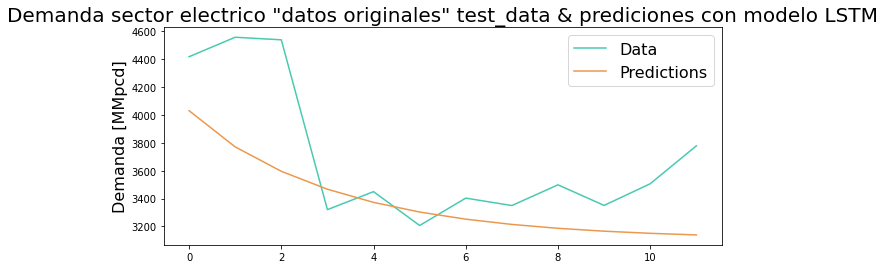

In [64]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(csv_demanda_electrico_original_test_data['Demanded_Gas'].values, color='#48C9B0')
plt.plot(true_predictions, color='#EB984E')
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico "datos originales" test_data & prediciones con modelo LSTM', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(csv_demanda_electrico_original_test_data['Demanded_Gas'],true_predictions))
print(rmse)

447.3914225690886
